**<p style="text-align: center;"><span style="background-color: #FFFF00"><font size= "8" color = "red">Weather conditions and Accidents</font></span></p>**

<div style='background-color:navy; color:white; padding:20px'>
</div>

<img src="https://mklstatic01.azureedge.net/~/media/specialty/2018-web/defensive-driving/dangerous-road-conditions.jpg?h=400&w=600&rev=5c1c7bcbafdf4e99987eed815602b635&hash=6F0ADD8C0CB16036F1031BB94B830C12" alt="Image"
        title="Severe weather condition" width=500 />

<div style='background-color:navy; color:white; padding:20px'>
</div>

# Purpose of Analysis
Primary purpose of analysing this dataset is to find the relation between the weather condition and accidents. This analysis is based on the US datasets, centered within the states of US. We believe that this topic of analysis, will gives us clear view regarding the following questions.
1. To which extent the weather conditions much contributes in the accidents.
2. Which weather is considered to be good or bad regarding the accidents.
3. To understand anykind of trend between the weather attributes, time and accident.
4. Relation between the Severity Level of accident and Weather factors.


# Description of the Attributes
For this analysis we are only taking the attributes of accidents which is related to the weather. The attributes mainly concerned with the temperature, humidity, pressure, visibility, wind direction and weather condition. Below dataframe is designed to give basic definition of the selected attributes. 

In [1]:
import pandas as pd
pd.set_option("max_colwidth", None)
attributes = pd.read_excel("/Users/Käyttäjä/Column_info.xlsx", index_col="#").iloc[:,:2]
attributes = attributes.loc[[1,4,5,7,8,17,18,24,25,26,27,28,29,30,31,32],:]
attributes.reset_index(level=0,inplace=True, drop=True)

In [2]:
attributes

,Attribute,Description
0,ID,This is a unique identifier of the accident record.
1,Severity,"Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)."
2,Start_Time,Shows start time of the accident in local time zone.
3,Start_Lat,Shows latitude in GPS coordinate of the start point.
4,Start_Lng,Shows longitude in GPS coordinate of the start point.
5,County,Shows the county in address field.
6,State,Shows the state in address field.
7,Temperature(F),Shows the temperature (in Fahrenheit).
8,Wind_Chill(F),Shows the wind chill (in Fahrenheit).
9,Humidity(%),Shows the humidity (in percentage).


# importing required library
Our expectation to use following library for our analysis therefore importing it. 

In [3]:
import os
import dask.array as da
import dask.dataframe as dd
from dask import compute
import numpy as np
from matplotlib import pyplot as plt
import dask
#from dask.distributed import Client
#client=Client() # this set up 1 worker per core
#client.cluster
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline(connected=True)

cf.set_config_file(theme="pearl")

# Importing Data

In [4]:
data = dd.read_csv("clean.csv",parse_dates = ["Start_Time", "End_Time"])

In [5]:
data = data.set_index("ID")

In [6]:
head = data.head()
tail = data.tail()

# Gathering Basic Information

In [7]:
head

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,Dayton,Montgomery,OH,36.9,91.0,...,False,False,False,False,False,False,Night,Night,Night,Night
A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,Westerville,Franklin,OH,37.4,100.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-100,2,2016-02-11 08:13:24,2016-02-11 08:43:24,39.749916,-84.139359,Dayton,Montgomery,OH,7.5,87.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-1000,2,2016-06-23 10:31:12,2016-06-23 11:01:12,38.653061,-121.070541,El Dorado Hills,El Dorado,CA,77.0,34.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-10000,3,2017-01-06 16:22:04,2017-01-06 16:51:29,38.574406,-121.577354,West Sacramento,Yolo,CA,46.0,71.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
tail

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Temperature(F),Humidity(%),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
ID,,,,,,,,,,,,,,,,,,,,,
A-999995,2,2019-08-26 08:06:59,2019-08-26 09:07:22,36.045235,-86.658531,Antioch,Davidson,TN,70.0,90.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-999996,2,2019-08-26 08:15:38,2019-08-26 10:16:36,36.191734,-86.777664,Nashville,Davidson,TN,70.0,90.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-999997,2,2019-08-26 08:12:46,2019-08-26 09:12:34,36.276863,-86.799614,Whites Creek,Davidson,TN,70.0,90.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-999998,2,2019-08-26 08:16:10,2019-08-26 11:38:45,36.144661,-86.816490,Nashville,Davidson,TN,70.0,90.0,...,False,False,False,False,False,False,Day,Day,Day,Day
A-999999,3,2019-08-26 08:19:31,2019-08-26 10:04:33,34.657188,-86.799873,Madison,Limestone,AL,70.0,100.0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
%%time
data_shape = data.compute().shape

Wall time: 19.6 s


In [10]:
col_names = data.columns

In [11]:
col_names

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'City',
       'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [12]:
required_cols = ["Severity", "Start_Time","Start_Lat", "Start_Lng", "County", "State", 'Temperature(F)', 
                "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Direction",
                "Weather_Condition"]

# Selection the Attributes

In [13]:
data1 = data[required_cols]

## Inspecting Head and Tail of Selected Data

In [14]:
head_s = data1.head()
tail_s = data1.tail()

In [15]:
head_s

,Severity,Start_Time,Start_Lat,Start_Lng,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition
ID,,,,,,,,,,,,
A-1,3,2016-02-08 05:46:00,39.865147,-84.058723,Montgomery,OH,36.9,91.0,29.68,10.0,Calm,Light Rain
A-10,3,2016-02-08 08:10:04,40.100590,-82.925194,Franklin,OH,37.4,100.0,29.62,3.0,SSW,Light Rain
A-100,2,2016-02-11 08:13:24,39.749916,-84.139359,Montgomery,OH,7.5,87.0,30.28,10.0,SSW,Scattered Clouds
A-1000,2,2016-06-23 10:31:12,38.653061,-121.070541,El Dorado,CA,77.0,34.0,30.02,10.0,SW,Clear
A-10000,3,2017-01-06 16:22:04,38.574406,-121.577354,Yolo,CA,46.0,71.0,30.09,10.0,NW,Clear


In [16]:
tail_s

,Severity,Start_Time,Start_Lat,Start_Lng,County,State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Weather_Condition
ID,,,,,,,,,,,,
A-999995,2,2019-08-26 08:06:59,36.045235,-86.658531,Davidson,TN,70.0,90.0,29.32,6.0,SSE,Light Rain
A-999996,2,2019-08-26 08:15:38,36.191734,-86.777664,Davidson,TN,70.0,90.0,29.32,6.0,SSE,Light Rain
A-999997,2,2019-08-26 08:12:46,36.276863,-86.799614,Davidson,TN,70.0,90.0,29.32,6.0,SSE,Light Rain
A-999998,2,2019-08-26 08:16:10,36.144661,-86.816490,Davidson,TN,70.0,90.0,29.32,6.0,SSE,Light Rain
A-999999,3,2019-08-26 08:19:31,34.657188,-86.799873,Limestone,AL,70.0,100.0,29.30,5.0,SE,Rain


# Data Summary
Our data summary reveals 4 attributes with object type, 6 attributes with float type, one integer type and one is in datetime formate.

In [17]:
data1.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 12 entries, Severity to Weather_Condition
dtypes: datetime64[ns](1), object(4), float64(6), int64(1)

In [18]:
description = data1.iloc[:,[0,6,7,8,9]].compute().describe()

In [19]:
description

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
count,3.402734e+06,3.402734e+06,3.402734e+06,3.402734e+06,3.402734e+06
mean,2.338176e+00,6.196703e+01,6.513355e+01,2.974581e+01,9.122390e+00
std,5.510958e-01,1.860003e+01,2.274918e+01,8.278789e-01,2.870044e+00
min,1.000000e+00,-2.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.000000e+01,4.900000e+01,2.973000e+01,1.000000e+01
50%,2.000000e+00,6.400000e+01,6.700000e+01,2.995000e+01,1.000000e+01
75%,3.000000e+00,7.590000e+01,8.400000e+01,3.009000e+01,1.000000e+01
max,4.000000e+00,1.706000e+02,1.000000e+02,5.774000e+01,1.400000e+02


## Corelation 
Following process is carried out to get an idea about how the columns are related with each other.

In [20]:
%%time
data_par1_corr = data1.compute().corr()

Wall time: 20.7 s


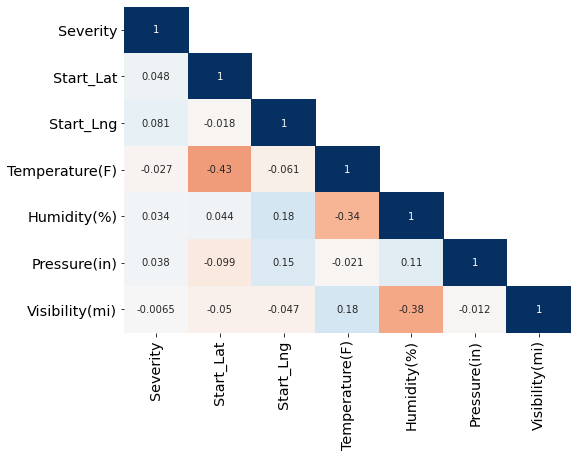

In [21]:
import seaborn as sns
mask = np.triu(np.ones_like(data_par1_corr), k=1)
plt.figure(figsize=(8,6))
sns.heatmap(data_par1_corr, vmin=-1, vmax=1, cbar=False,
                cmap='RdBu',mask=mask, annot=True)
plt.xticks(rotation=90, size='x-large')
plt.yticks(rotation=0, size='x-large')
plt.show()

# Tidying & Analysing the Dataset
Our main task in this topic is to groupby with categorical variable to see the behaviour of attribute.

## Overview on State Accidents

In [22]:
state_acc = data1.State.value_counts().compute()

In [23]:
state_acc.iplot(kind="bar", title="Number of State-Wise Accidents, USA", xTitle="State", yTitle="No. of Accidents")

<div style='background-color:navy; color:white; padding:20px'>
    Graph for the accident happen throughouot the states of US.
</div>

## Grouping by with Severity Level

In [24]:
g_severity = data1.groupby("Severity").mean().compute()

In [25]:
g_severity.iloc[:,2:].iplot(kind = "bar", title="Mean value of Attributes According to Severity Level", yTitle="Values",
                            xTitle="Severity Level", opacity=0.6)

<div style='background-color:navy; color:white; padding:20px'>
    <li> For the severity level 1, mean temperature is higher than severity level 4
    <li> For hiher severity level mean humidity is slightly higher.
    <li> Mean pressure and visibility has no change over the severity level of accidents.
</div>

## Time Series

In [26]:
month_g = data1.set_index("Start_Time",drop=True)
month_gr = month_g.resample("MS")
acc_timeseries = month_gr.count().Severity.compute()
month_df = month_gr.mean()
month_df["Accident_Count"] = acc_timeseries
dfm = month_df.compute()

In [27]:
dfm.iloc[:,3:8].iplot(kind="line", title = "Weather Attributes and Relation", xTitle="Time",
                      yTitle="Monthly mean of Weather attributes",secondary_y="Accident_Count",
         secondary_y_title="No.of Accident")

<div style='background-color:navy; color:white; padding:20px'>
    Purpose of this graph is to find the relatable trend. But the trend doesnot show clear relation between the attributes and number of accident.
    <li> initially experience the rise in temperature and accident count. But later the trend doesnot follow.
    <li> Trend of humidity remains at the same level with little fluctuation while the accident count goes on increasing.
    <li> The trend of pressure and visibility is not comparable for this study for the accident count because it remains same throughout the trend
</div>

## Monthly Findings

In [28]:
with_tim = data1.assign(year = data1.Start_Time.dt.year,
                   month = data1.Start_Time.dt.month,
                   weekday = data1.Start_Time.dt.weekday,
                   hour = data1.Start_Time.dt.hour)
with_time = with_tim[with_tim.year < 2020]

In [29]:
monthy_stats = with_time.groupby("month")
acc_counts = monthy_stats.count().Severity.compute()
m_m = monthy_stats.mean().compute()
m_m["acc_counts"] = acc_counts

In [30]:
m_m.iloc[:,[3,4,5,6,10]].iplot(kind="bar", title = "Monthly Preview of Accident and Weather Attributes", xTitle="Months",
         yTitle="Mean of Monthly Summation", secondary_y="acc_counts",secondary_y_title="Month-Wise accident count",
         opacity=0.5)

<div style='background-color:navy; color:white; padding:20px'>
    The graph shows monthly variation of weather attributes to the number of accidents.
    <li> Last four month of the year in which the temperatur is dropping and humidity is increasing, we will find in the rise in the number of accident
</div>

## Weather Condition

In [31]:
weather_stats = with_time.groupby("Weather_Condition")
acc_count = weather_stats.count().Severity.compute()
w_m = weather_stats.mean().compute()
w_m["acc_count"] = acc_count

In [32]:
w_m["acc_count"].iplot(kind="bar", title = "Weather condition and Accidents", xTitle="Weather conditions",
         yTitle="No.of Accidents",
         opacity=0.5)

<div style='background-color:navy; color:white; padding:20px'>
    The figure shows that, majority of accidents happened in clear and fair weather condition
</div>

## Wind_Direction

In [33]:
wind_dir = []
for i in data1.Wind_Direction:
    if i == "CALM":
        a= "Calm"
        wind_dir.append(a)
    elif i == "East":
        b= "E"
        wind_dir.append(b)
    elif i == "North":
        c = "N"
        wind_dir.append(c)
    elif i == "NNE":
        d = "NE"
        wind_dir.append(d)
    elif i == "NNW":
        e = "NW"
        wind_dir.append(e)
    elif i == "South":
        f = "S"
        wind_dir.append(f)
    elif i == "SSE":
        g = "SE"
        wind_dir.append(g)
    elif i == "SSW":
        h = "SW"
        wind_dir.append(h)
    elif i == "West":
        j = "W"
        wind_dir.append(j)
    elif i == "Variable":
        k = "VAR"
        wind_dir.append(k)
    else:
        wind_dir.append(i)
        
wind_dir1 = pd.DataFrame(wind_dir)
reindex = data1.reset_index()
wind_di = reindex.join(wind_dir1)


In [34]:
wind_direction = wind_di.groupby(0)
acci_count = wind_direction.count().Severity.compute()
wi_d = wind_direction.mean().compute()
wi_d["acci_count"] = acci_count
wi_d=wi_d.drop(labels = "VAR")

In [35]:
wi_d["acci_count"].iplot(kind="bar", title = "Wind Direction and Accidents", xTitle="Wind Direction",
         yTitle="No.of Accidents",
         opacity=0.5)

<div style='background-color:navy; color:white; padding:20px'>
    The figure shows that, majority of accidents happened during calm wind condition followed by south-west wind.
</div>

# Conclusion

Our analysis concludes that, there is not significant affect of weather attributes towards the accident occure in United States. Although, weather attributes shows positive relation with the accidents count, but the affect level is low. The severity level of accident also seems to have low effect from weather attributes. We have strong doubt that these accidents might carry strong relationship with other attributes like increase in population, high sales of vehicles, geographical area.  


# Appendix

In [36]:
import folium
from folium import plugins
log_lat = data.get_partition(0)[['Start_Lat', 'Start_Lng', "State"]]
new_df=pd.DataFrame(log_lat.compute())
sample = new_df.sample(300)
map_ = folium.Map(location=[38,-98],zoom_start=4)
sample.apply(lambda row: folium.Marker(location=[row["Start_Lat"],row["Start_Lng"]],popup=row["State"]).add_to(map_),axis=1)
map_